In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.python.keras import layers
from tensorflow.python.keras.models import Model
import tensorflow_hub as hub
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K
#from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
import numpy as np
from IPython.display import Image
from tensorflow.keras.optimizers import Adam

# Accessing My Google Drive
drive.mount('/content/drive', force_remount=True)  # access my drive

Mounted at /content/drive


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)
#tf.enable_eager_execution()
import tensorflow_hub as hub
import os
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
#from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
target_size=(256,256) #provided by network resizing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split



train_generator = train_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/AMM/images_training',
    target_size=target_size,
    color_mode='rgb',
    batch_size=64,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/AMM/images_training', # same directory as training data
    target_size=target_size,
    color_mode='rgb',
    batch_size=64,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 476 images belonging to 5 classes.
Found 117 images belonging to 5 classes.


In [ ]:
train_generator.image_shape

(256, 256, 3)

In [ ]:
train_generator.class_indices

{'10': 0, '100': 1, '20': 2, '200': 3, '50': 4}

In [ ]:
model = tf.keras.Sequential([
   tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(256,256,3)),
   tf.keras.layers.MaxPool2D(
    pool_size=(2, 2)),
   tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(
    pool_size=(2, 2)),
   tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(
    pool_size=(2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
EPOCHS = 20
INIT_LR = 1e-3
BS = 32

In [ ]:
from tensorflow.python import metrics
# opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
# model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
model.compile(optimizer=Adam(learning_rate=INIT_LR), loss="binary_crossentropy", metrics=["acc"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [ ]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)

In [ ]:
history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        #callbacks=[EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)],
        epochs=10,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/10
7/7 [==============================] - 89s 11s/step - loss: 0.2327 - acc: 0.7573 - val_loss: 0.2208 - val_acc: 0.7656
Epoch 2/10
7/7 [==============================] - 72s 10s/step - loss: 0.2011 - acc: 0.8131 - val_loss: 0.3060 - val_acc: 0.7031
Epoch 3/10
7/7 [==============================] - 80s 10s/step - loss: 0.2097 - acc: 0.7888 - val_loss: 0.2715 - val_acc: 0.6562
Epoch 4/10
7/7 [==============================] - 76s 11s/step - loss: 0.2199 - acc: 0.7812 - val_loss: 0.2177 - val_acc: 0.8125
Epoch 5/10
7/7 [==============================] - 74s 10s/step - loss: 0.1915 - acc: 0.8010 - val_loss: 0.1979 - val_acc: 0.8125
Epoch 6/10
7/7 [==============================] - 74s 10s/step - loss: 0.1849 - acc: 0.8131 - val_loss: 0.2140 - val_acc: 0.7656
Epoch 7/10
7/7 [==============================] - 76s 10s/step - loss: 0.1907 - acc: 0.8036 - val_loss: 0.2519 - val_acc: 0.7656
Epoch 8/10
7/7 [==============================] - 75s 10s/step - loss: 0.1629 - acc: 0.8422 - val

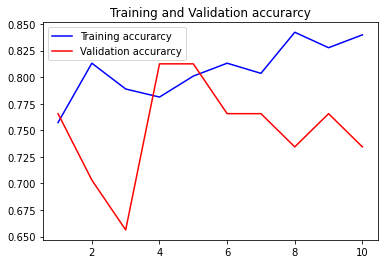

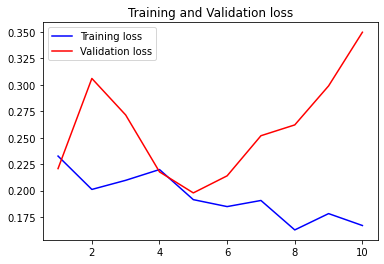

In [ ]:
import matplotlib
import matplotlib.pyplot as plt


accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
#Train and validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accurarcy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model
model.save('EgyptianCurrency.h5')

In [ ]:
model.save_weights('EgyptianCurrency.h5')

In [ ]:
classes = train_generator.class_indices 
classes

{'10': 0, '100': 1, '20': 2, '200': 3, '50': 4}

In [ ]:
Classes = ["10 LE","100 LE","20 LE","200 LE","50 LE"]
print(Classes)

['10 LE', '100 LE', '20 LE', '200 LE', '50 LE']


1/1 [==============================] - 0s 49ms/step
[8.7406510e-01 7.9879142e-02 3.0173536e-05 1.8915255e-02 2.7110288e-02]

Paper: 10 LE


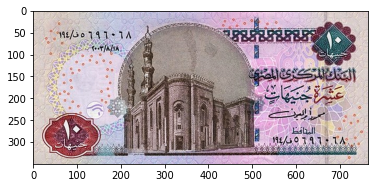

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = tf.keras.utils.load_img(img_path, target_size=(256, 256))
    x = tf.keras.utils.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict([prepare('/content/drive/MyDrive/AMM/images_testing/10 front.jpg')])
Paper=tf.keras.utils.load_img('/content/drive/MyDrive/AMM/images_testing/10 front.jpg')
plt.imshow(Paper)
print(result.flatten())
print ("\nPaper:", Classes[int(result.argmax())])